In [1]:
!pip install wbgapi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbgapi as wb
from sklearn.linear_model import LinearRegression

from scipy import linalg
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2022-09-16
3,Worldwide Governance Indicators,WGI,3,2022-09-23
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-01-14
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2022-06-23
15,Global Economic Monitor,GEM,3,2020-07-27


In [3]:
wb.series.info(db=63)

id,value
HD.HCI.AMRT,Survival Rate from Age 15-60
HD.HCI.AMRT.FE,"Survival Rate from Age 15-60, Female"
HD.HCI.AMRT.MA,"Survival Rate from Age 15-60, Male"
HD.HCI.EYRS,Expected Years of School
HD.HCI.EYRS.FE,"Expected Years of School, Female"
HD.HCI.EYRS.MA,"Expected Years of School, Male"
HD.HCI.HLOS,Harmonized Test Scores
HD.HCI.HLOS.FE,"Harmonized Test Scores, Female"
HD.HCI.HLOS.MA,"Harmonized Test Scores, Male"
HD.HCI.LAYS,Learning-Adjusted Years of School


In [4]:
wb.series.metadata.get('SP.POP.65UP.TO.ZS')

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"Patterns of development in a country are partly determined by the age composition of its population. Different age groups have different impacts on both the environment and on infrastructure needs. Therefore the age structure of a population is useful for analyzing resource use and formulating future policy and planning goals with regards infrastructure and development. This indicator is used for calculating age dependency ratio (percent of working-age population). The age dependency ratio is the ratio of the sum of the population aged 0-14 and the population aged 65 and above to the population aged 15-64. In many developing countries, the once rapidly growing population group of the under-15 population is shrinking. As a result, high fertility rates, together with declining mortality rates, are now reflected in the larger share of the 65 and older population."
IndicatorName,Population ages 65 and above (% of total population)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,"Because the five-year age group is the cohort unit and five-year period data are used in the United Nations Population Division's World Population Prospects, interpolations to obtain annual data or single age structure may not reflect actual events or age composition. For more information, see the original source."
Longdefinition,"Population ages 65 and above as a percentage of the total population. Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship."
Periodicity,Annual
Source,World Bank staff estimates based on age/sex distributions of United Nations Population Division's World Population Prospects: 2019 Revision.
Statisticalconceptandmethodology,"Age structure in the World Bank's population estimates is based on the age structure in United Nations Population Division's World Population Prospects. For more information, see the original source. Total population is based on the de facto population including all residents regardless of legal status or citizenship. The values shown are midyear estimates. For more information see metadata for total population (SP.POP.TOTL)."


In [5]:
wb.economy.info()

id,value,region,incomeLevel
ABW,Aruba,LCN,HIC
AFE,Africa Eastern and Southern,,
AFG,Afghanistan,SAS,LIC
AFW,Africa Western and Central,,
AGO,Angola,SSF,LMC
ALB,Albania,ECS,UMC
AND,Andorra,ECS,HIC
ARB,Arab World,,
ARE,United Arab Emirates,MEA,HIC
ARG,Argentina,LCN,UMC


In [6]:
tabla=wb.data.DataFrame(["FP.CPI.TOTL.ZG","HD.HCI.OVRL","NY.GDP.PCAP.CD","SE.XPD.TOTL.GD.ZS","SH.STA.SUIC.P5",
                         "SL.EMP.WORK.ZS","SL.UEM.TOTL.ZS","SP.DYN.LE00.IN","SP.POP.65UP.TO.ZS","VC.IHR.PSRC.P5"],
                        ["ALB","DEU","ARG","ARM","AUS","AUT","BGD","BOL","BRA","BTN","CAN","CHN","COL","KOR","CRI",
                         "DNK","SLV","ARE","ESP","USA","EST","FJI","FIN","FRA","GRC","IND","IDN","ISL","IRL","ISR",
                         "JAM","JPN","LBN","MYS","MAR","MEX","PAK","PER","URY","POL","QAT","GBR","DOM","SRB","ZAF",
                         "CHE","THA","TZA","TUN","TUR","UKR","YEM","AGO","SYR","SGP","RUS","SDN","KAZ","PNG","NLD"],range(2017,2018))
tabla

,FP.CPI.TOTL.ZG,HD.HCI.OVRL,NY.GDP.PCAP.CD,SE.XPD.TOTL.GD.ZS,SH.STA.SUIC.P5,SL.EMP.WORK.ZS,SL.UEM.TOTL.ZS,SP.DYN.LE00.IN,SP.POP.65UP.TO.ZS,VC.IHR.PSRC.P5
economy,,,,,,,,,,
AGO,29.843587,0.361,2313.220584,2.466879,6.0,22.600000,7.408000,60.379000,2.239197,NaN
ALB,2.060598,0.621,4531.019374,3.611730,4.7,42.900002,13.620000,78.333000,13.329073,2.010978
ARE,1.966826,0.659,40644.791191,NaN,5.6,96.529999,2.460000,77.647000,1.034678,NaN
ARG,NaN,0.611,14613.041825,5.454320,8.9,74.660004,8.350000,76.372000,10.989707,5.273443
ARM,0.969553,0.572,3914.527854,2.707590,3.0,59.660000,17.700001,74.797000,11.096645,2.377080
AUS,1.948647,0.803,53934.250175,5.136810,13.1,83.099998,5.590000,82.500000,15.404021,0.846057
AUT,2.081269,0.793,47429.158456,5.371590,15.4,87.620003,5.500000,81.643902,18.956573,0.793660
BGD,5.702070,0.479,1839.583378,NaN,3.5,39.500000,4.370000,72.052000,5.149475,2.222495
BOL,2.822758,NaN,3351.124344,8.660000,6.4,31.139999,3.650000,70.945000,7.045879,6.405873


In [7]:
tabla.rename(columns={'FP.CPI.TOTL.ZG':"Inflacion_A", 'HD.HCI.OVRL':"IDH", 
                      'NY.GDP.PCAP.CD':"PIB_perca",'SE.XPD.TOTL.GD.ZS':"GPEDU_PIB",
                      'SH.STA.SUIC.P5':"Suicidio_rate", 'SL.EMP.WORK.ZS':"Salario empleados", 
                      'SL.UEM.TOTL.ZS':"Desempleo_total", 'SP.DYN.LE00.IN':"Esperanza_vida",
                      'SP.POP.65UP.TO.ZS':"POB_+65", 'VC.IHR.PSRC.P5':"Homicidios_inte"},inplace=True)

In [8]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, AGO to ZAF
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Inflacion_A        57 non-null     float64
 1   IDH                56 non-null     float64
 2   PIB_perca          60 non-null     float64
 3   GPEDU_PIB          52 non-null     float64
 4   Suicidio_rate      60 non-null     float64
 5   Salario empleados  60 non-null     float64
 6   Desempleo_total    60 non-null     float64
 7   Esperanza_vida     60 non-null     float64
 8   POB_+65            60 non-null     float64
 9   Homicidios_inte    48 non-null     float64
dtypes: float64(10)
memory usage: 5.2+ KB


In [9]:
tabla.isna().sum()

Inflacion_A           3
IDH                   4
PIB_perca             0
GPEDU_PIB             8
Suicidio_rate         0
Salario empleados     0
Desempleo_total       0
Esperanza_vida        0
POB_+65               0
Homicidios_inte      12
dtype: int64

In [10]:
print((tabla.isnull().sum()/tabla.shape[0])*100.0)

Inflacion_A           5.000000
IDH                   6.666667
PIB_perca             0.000000
GPEDU_PIB            13.333333
Suicidio_rate         0.000000
Salario empleados     0.000000
Desempleo_total       0.000000
Esperanza_vida        0.000000
POB_+65               0.000000
Homicidios_inte      20.000000
dtype: float64


In [11]:
tabla.duplicated().sum()

0

In [12]:
tabla.columns

Index(['Inflacion_A', 'IDH', 'PIB_perca', 'GPEDU_PIB', 'Suicidio_rate',
       'Salario empleados', 'Desempleo_total', 'Esperanza_vida', 'POB_+65',
       'Homicidios_inte'],
      dtype='object')

In [13]:
tabla.columns[tabla.isnull().any()]

Index(['Inflacion_A', 'IDH', 'GPEDU_PIB', 'Homicidios_inte'], dtype='object')

In [14]:
Inflacion_A_not_null = tabla.drop(tabla[tabla.Inflacion_A.isnull()].index)
Inflacion_A_null = tabla.drop(Inflacion_A_not_null.index)
features = ['PIB_perca','Suicidio_rate','Desempleo_total', 'Esperanza_vida','POB_+65']
y = Inflacion_A_not_null['Inflacion_A']
x = Inflacion_A_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = Inflacion_A_null[features]
predicted_Inflacion_A = model.predict(x)
tabla.loc[tabla.Inflacion_A.isnull(),"Inflacion_A"] = predicted_Inflacion_A
tabla.Inflacion_A.isna().sum()

0

In [15]:
GPEDU_PIB_not_null = tabla.drop(tabla[tabla.GPEDU_PIB.isnull()].index)
GPEDU_PIB_null = tabla.drop(GPEDU_PIB_not_null.index)
features = ['PIB_perca','Suicidio_rate','Desempleo_total', 'Esperanza_vida','POB_+65']
y = GPEDU_PIB_not_null['GPEDU_PIB']
x = GPEDU_PIB_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = GPEDU_PIB_null[features]
predicted_GPEDU_PIB = model.predict(x)
tabla.loc[tabla.GPEDU_PIB.isnull(),"GPEDU_PIB"] = predicted_GPEDU_PIB
tabla.GPEDU_PIB.isna().sum()

0

In [16]:
IDH_not_null = tabla.drop(tabla[tabla.IDH.isnull()].index)
IDH_null = tabla.drop(IDH_not_null.index)
features = ['PIB_perca','Suicidio_rate','Desempleo_total', 'Esperanza_vida','POB_+65']
y = IDH_not_null['IDH']
x = IDH_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = IDH_null[features]
predicted_IDH = model.predict(x)
tabla.loc[tabla.IDH.isnull(),"IDH"] = predicted_IDH
tabla.IDH.isna().sum()

0

In [17]:
Homicidios_inte_not_null = tabla.drop(tabla[tabla.Homicidios_inte.isnull()].index)
Homicidios_inte_null = tabla.drop(Homicidios_inte_not_null.index)
features = ['PIB_perca','Suicidio_rate','Desempleo_total', 'Esperanza_vida','POB_+65']
y = Homicidios_inte_not_null['Homicidios_inte']
x = Homicidios_inte_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = Homicidios_inte_null[features]
predicted_Homicidios_inte = model.predict(x)
tabla.loc[tabla.Homicidios_inte.isnull(),"Homicidios_inte"] = predicted_Homicidios_inte
tabla.Homicidios_inte.isna().sum()

0

In [18]:
tabla.isna().sum()

Inflacion_A          0
IDH                  0
PIB_perca            0
GPEDU_PIB            0
Suicidio_rate        0
Salario empleados    0
Desempleo_total      0
Esperanza_vida       0
POB_+65              0
Homicidios_inte      0
dtype: int64

In [19]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, AGO to ZAF
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Inflacion_A        60 non-null     float64
 1   IDH                60 non-null     float64
 2   PIB_perca          60 non-null     float64
 3   GPEDU_PIB          60 non-null     float64
 4   Suicidio_rate      60 non-null     float64
 5   Salario empleados  60 non-null     float64
 6   Desempleo_total    60 non-null     float64
 7   Esperanza_vida     60 non-null     float64
 8   POB_+65            60 non-null     float64
 9   Homicidios_inte    60 non-null     float64
dtypes: float64(10)
memory usage: 7.2+ KB


In [20]:
tabla

,Inflacion_A,IDH,PIB_perca,GPEDU_PIB,Suicidio_rate,Salario empleados,Desempleo_total,Esperanza_vida,POB_+65,Homicidios_inte
economy,,,,,,,,,,
AGO,29.843587,0.361000,2313.220584,2.466879,6.0,22.600000,7.408000,60.379000,2.239197,25.187132
ALB,2.060598,0.621000,4531.019374,3.611730,4.7,42.900002,13.620000,78.333000,13.329073,2.010978
ARE,1.966826,0.659000,40644.791191,4.363172,5.6,96.529999,2.460000,77.647000,1.034678,10.013686
ARG,3.763097,0.611000,14613.041825,5.454320,8.9,74.660004,8.350000,76.372000,10.989707,5.273443
ARM,0.969553,0.572000,3914.527854,2.707590,3.0,59.660000,17.700001,74.797000,11.096645,2.377080
AUS,1.948647,0.803000,53934.250175,5.136810,13.1,83.099998,5.590000,82.500000,15.404021,0.846057
AUT,2.081269,0.793000,47429.158456,5.371590,15.4,87.620003,5.500000,81.643902,18.956573,0.793660
BGD,5.702070,0.479000,1839.583378,4.095541,3.5,39.500000,4.370000,72.052000,5.149475,2.222495
BOL,2.822758,0.522145,3351.124344,8.660000,6.4,31.139999,3.650000,70.945000,7.045879,6.405873


#Aplicación de PCA. Conservando únicamente tres componentes.

In [21]:
X = tabla.to_numpy()
scal = StandardScaler()
X_scal = scal.fit_transform(tabla)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scal)

In [22]:
tabla = tabla.to_numpy()

La estandarización de datos, en ocasiones también conocida como normalización, es el proceso de ajustar o adaptar ciertas características para que los datos se asemejen a un tipo, modelo o normal común con el objetivo de que su tratamiento, acceso y uso sea más sencillo para los usuarios o personas que dispongan de ellos.

In [23]:
#Estandarización del Dataset (tabla) 
l = []
for i in tabla.T:
  u = i.mean()
  s = i.std()
  scal = (i - u) / s
  l.append(scal)

tabla_scal = np.array(l).T

In [24]:
cov_x = np.cov(tabla_scal.T)
cov_x

array([[ 1.01694915, -0.50815507, -0.39018102, -0.18672067, -0.12349198,
        -0.37728563,  0.25911881, -0.62543554, -0.39168267,  0.32759579],
       [-0.50815507,  1.01694915,  0.75911838,  0.20888139,  0.45731457,
         0.78710853, -0.21972931,  0.89058014,  0.81745606, -0.56573962],
       [-0.39018102,  0.75911838,  1.01694915,  0.24530986,  0.33861029,
         0.71705494, -0.28062353,  0.73727543,  0.54977959, -0.4446895 ],
       [-0.18672067,  0.20888139,  0.24530986,  1.01694915,  0.20722068,
         0.22966802, -0.03885975,  0.22077408,  0.25352253, -0.05420509],
       [-0.12349198,  0.45731457,  0.33861029,  0.20722068,  1.01694915,
         0.51368796, -0.05475477,  0.20135391,  0.47380123, -0.21890435],
       [-0.37728563,  0.78710853,  0.71705494,  0.22966802,  0.51368796,
         1.01694915,  0.0151148 ,  0.72466184,  0.60829861, -0.29921114],
       [ 0.25911881, -0.21972931, -0.28062353, -0.03885975, -0.05475477,
         0.0151148 ,  1.01694915, -0.14749301

In [25]:
np.linalg.eig(pd.DataFrame(tabla).corr().to_numpy())

(array([4.8707367 , 1.25254423, 0.06639854, 0.10560528, 0.21904416,
        0.3681363 , 0.96448542, 0.87914008, 0.59619843, 0.67771086]),
 array([[ 0.27335865, -0.32981146,  0.10406658,  0.12573626, -0.17671452,
         -0.24811513,  0.08220688, -0.4114899 ,  0.70541103, -0.15291903],
        [-0.43023237,  0.00353855, -0.77550849,  0.28438776, -0.22681347,
         -0.25192072,  0.10508652, -0.04507096,  0.05635183,  0.03793768],
        [-0.37286998,  0.07512119, -0.04228765, -0.03280358,  0.70825859,
          0.22855883, -0.05494051, -0.07502959,  0.46936347,  0.26389604],
        [-0.14430331, -0.22059739, -0.03735566,  0.01604493, -0.08476567,
          0.04015166, -0.81520159,  0.34243491,  0.17156602, -0.32986798],
        [-0.22888065, -0.40103774,  0.12732315,  0.28891992,  0.11105036,
          0.14428597, -0.21268344, -0.64188656, -0.44327034, -0.01430567],
        [-0.37150779, -0.2616726 ,  0.11585489, -0.47771241, -0.52174488,
          0.31912289,  0.04661079, -0.03108

In [26]:
val_p, vec_p = linalg.eig(cov_x)
val_p, vec_p

(array([4.95329156+0.j, 1.2737738 +0.j, 0.06752393+0.j, 0.1073952 +0.j,
        0.22275677+0.j, 0.3743759 +0.j, 0.98083263+0.j, 0.89404076+0.j,
        0.60630349+0.j, 0.68919749+0.j]),
 array([[ 0.27335865, -0.32981146,  0.10406658,  0.12573626, -0.17671452,
         -0.24811513,  0.08220688, -0.4114899 ,  0.70541103, -0.15291903],
        [-0.43023237,  0.00353855, -0.77550849,  0.28438776, -0.22681347,
         -0.25192072,  0.10508652, -0.04507096,  0.05635183,  0.03793768],
        [-0.37286998,  0.07512119, -0.04228765, -0.03280358,  0.70825859,
          0.22855883, -0.05494051, -0.07502959,  0.46936347,  0.26389604],
        [-0.14430331, -0.22059739, -0.03735566,  0.01604493, -0.08476567,
          0.04015166, -0.81520159,  0.34243491,  0.17156602, -0.32986798],
        [-0.22888065, -0.40103774,  0.12732315,  0.28891992,  0.11105036,
          0.14428597, -0.21268344, -0.64188656, -0.44327034, -0.01430567],
        [-0.37150779, -0.2616726 ,  0.11585489, -0.47771241, -0.52174

In [27]:
# Elección de 3 componentes
val_p = val_p[:3]
vec_p = vec_p[:, :3]

In [28]:
W = vec_p
W

array([[ 0.27335865, -0.32981146,  0.10406658],
       [-0.43023237,  0.00353855, -0.77550849],
       [-0.37286998,  0.07512119, -0.04228765],
       [-0.14430331, -0.22059739, -0.03735566],
       [-0.22888065, -0.40103774,  0.12732315],
       [-0.37150779, -0.2616726 ,  0.11585489],
       [ 0.09832216, -0.68027174, -0.13750748],
       [-0.40900144,  0.10592843,  0.54933402],
       [-0.37014522, -0.2337389 ,  0.18433548],
       [ 0.27560548, -0.28102902, -0.01684497]])

In [29]:
# proyectar tabla en W
pca_p = tabla_scal @ W

In [30]:
pca_p = pd.DataFrame(pca_p, columns=[f'PCA{i}' for i in range(1, pca_p.shape[1] + 1)])

In [31]:
pca_p.head()

,PCA1,PCA2,PCA3
0,5.412146,-0.763093,-0.052009
1,0.547203,0.107509,-0.034121
2,-0.466485,1.140605,-0.168604
3,-0.153871,-0.231571,0.117028
4,0.983160,-0.305824,-0.213324


In [32]:
tabla

array([[2.98435867e+01, 3.61000000e-01, 2.31322058e+03, 2.46687889e+00,
        6.00000000e+00, 2.26000004e+01, 7.40799999e+00, 6.03790000e+01,
        2.23919656e+00, 2.51871319e+01],
       [2.06059846e+00, 6.21000000e-01, 4.53101937e+03, 3.61173010e+00,
        4.70000000e+00, 4.29000015e+01, 1.36199999e+01, 7.83330000e+01,
        1.33290733e+01, 2.01097786e+00],
       [1.96682558e+00, 6.59000000e-01, 4.06447912e+04, 4.36317231e+00,
        5.60000000e+00, 9.65299988e+01, 2.46000004e+00, 7.76470000e+01,
        1.03467798e+00, 1.00136859e+01],
       [3.76309750e+00, 6.11000000e-01, 1.46130418e+04, 5.45431995e+00,
        8.90000000e+00, 7.46600037e+01, 8.35000038e+00, 7.63720000e+01,
        1.09897071e+01, 5.27344256e+00],
       [9.69553269e-01, 5.72000000e-01, 3.91452785e+03, 2.70759010e+00,
        3.00000000e+00, 5.96599998e+01, 1.77000008e+01, 7.47970000e+01,
        1.10966449e+01, 2.37708033e+00],
       [1.94864741e+00, 8.03000000e-01, 5.39342502e+04, 5.13680983e+00,
   

In [33]:
scal = StandardScaler()
tabla_scal = scal.fit_transform(tabla)

pca = PCA(n_components=3)
tabla_pca = pca.fit_transform(tabla_scal)

pca_3 = pd.DataFrame(tabla_pca, columns=['PCA1','PCA2','PCA3'])

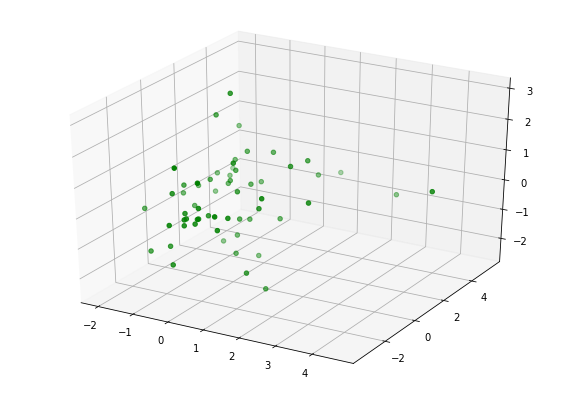

In [34]:
z = pca_3['PCA1']
x = pca_3['PCA2']
y = pca_3['PCA3']
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, z, y, color = "green")
 
# show plot
plt.show()
#plt.savefig("pca.png")

In [35]:
Scene = dict(xaxis = dict(title  = 'PCA1'),yaxis = dict(title  = 'PCA2'),zaxis = dict(title  = 'PCA3'))

In [36]:
trace = go.Scatter3d(x=pca_3['PCA1'], y=pca_3['PCA2'], z=pca_3['PCA3'], mode='markers',marker=dict(color = 'green', size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [37]:
pca3 = PCA()
pca3.fit(X_scal)

PCA()

In [38]:
pca3.explained_variance_

array([4.95329156, 1.2737738 , 0.98083263, 0.89404076, 0.68919749,
       0.60630349, 0.3743759 , 0.22275677, 0.1073952 , 0.06752393])

In [39]:
pca3.explained_variance_ratio_

array([0.48707367, 0.12525442, 0.09644854, 0.08791401, 0.06777109,
       0.05961984, 0.03681363, 0.02190442, 0.01056053, 0.00663985])

In [40]:
np.cumsum(pca3.explained_variance_ratio_)

array([0.48707367, 0.61232809, 0.70877664, 0.79669064, 0.86446173,
       0.92408157, 0.9608952 , 0.98279962, 0.99336015, 1.        ])

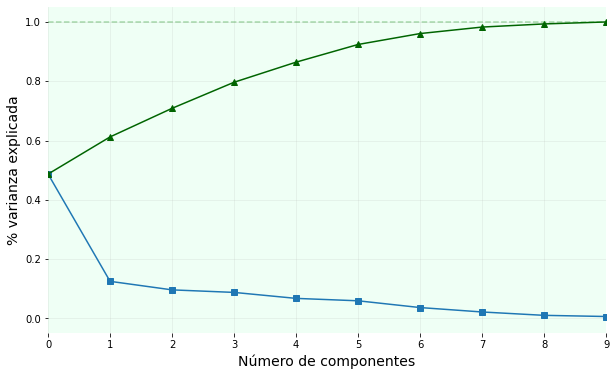

In [41]:
#Graficación de la varianza explicada y la varianza acumulada.
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.set_facecolor('#EFFFF5')
plt.plot(range(10),pca3.explained_variance_ratio_, marker='s', label='varianza_explicada')
plt.plot(range(10),np.cumsum(pca3.explained_variance_ratio_), marker='^', color='darkgreen', label='varianza_acumulada')
plt.xlim(0.8,4.5)
plt.ylim(-0.05,1.05)
plt.xticks(ticks=range(10))
plt.axhline(1, ls='--', color='g', alpha=0.3)
plt.xlabel('Número de componentes', size=14)
plt.ylabel('% varianza explicada', size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.grid(alpha=0.2, axis='both')
plt.show()

#Cluster y Kmeans ( Davies-Bouldin)


In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [43]:
scores = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, random_state=777,algorithm='elkan').fit(X_scal)
  labels = kmeans.labels_
  scores.append(davies_bouldin_score(X_scal, labels))

In [44]:
print(davies_bouldin_score(X_scal, labels))

1.0347763561913323


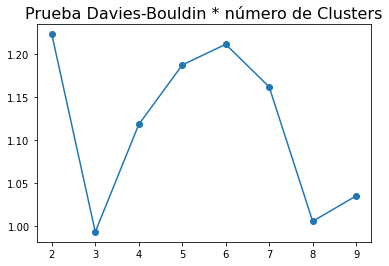

<Figure size 432x288 with 0 Axes>

In [45]:
plt.title('Prueba Davies-Bouldin * número de Clusters',fontsize=16)
plt.plot(range(2,10),scores)
plt.scatter(range(2,10),scores)
plt.xticks(range(2,10))
plt.show()
plt.savefig("davies.jpg")

#INICIO DE K MEANS

In [46]:
kmeans = KMeans(n_clusters=3, random_state=777,algorithm='elkan').fit(X_scal)
pca_3['labels'] = kmeans.labels_

In [47]:
kmeans.labels_

array([2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

In [48]:
kmea = kmeans.labels_
kmea2=pd.DataFrame(kmea)
kmea2.to_csv("kmea.csv")

In [49]:
centroides = {}
k = 3
for i in range(k):
  centroides[i] = X[np.random.choice(len(X))]

centroides

{0: array([5.31871605e+00, 4.00000000e-01, 1.00490662e+03, 4.43051004e+00,
        4.20000000e+00, 1.49099998e+01, 2.17700005e+00, 6.44790000e+01,
        2.58366125e+00, 1.97636279e+01]),
 1: array([3.87120116e+00, 6.22000000e-01, 1.02593048e+04, 4.67531013e+00,
        5.40000000e+00, 7.39800034e+01, 3.41000009e+00, 7.58280000e+01,
        6.43395202e+00, 1.00166130e+01]),
 2: array([6.21809383e+00, 6.00000000e-01, 1.86908938e+04, 4.47097015e+00,
        2.08000000e+01, 7.19599991e+01, 7.88999987e+00, 7.76320000e+01,
        1.47002262e+01, 8.23477549e+00])}

In [50]:
#calcular la distancia del cluster a cada punto

def dista_euclidiana(puntos, centroide):
  return np.sqrt(sum((puntos-centroide)**2))

distancias = {}

for i in range(len(X)):
  distancias[i] = []

for pos, dato in enumerate(X):
  for pos_, centroide in centroides.items():
    distancias[pos].append(dista_euclidiana(dato, centroide))

In [51]:
puntos_centroides = {}

for i in range(k):
  puntos_centroides[i] = []

for pos, dists in distancias.items():
  puntos_centroides[dists.index(min(dists))].append(X[pos])

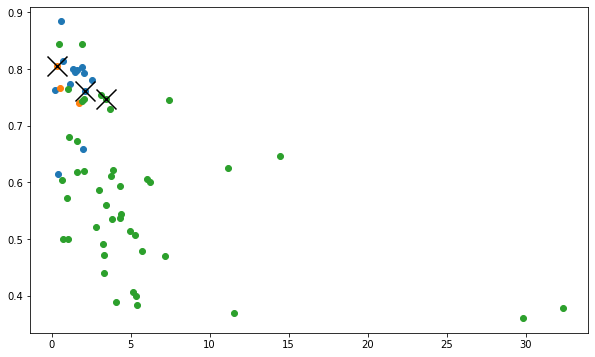

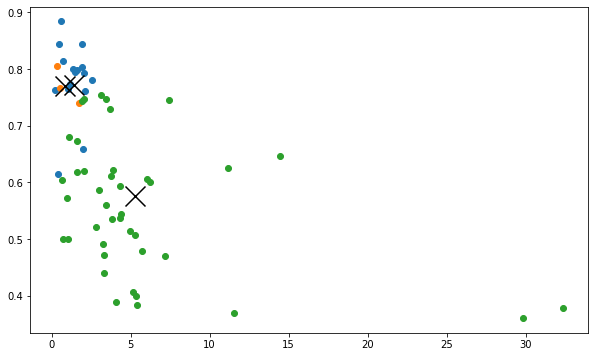

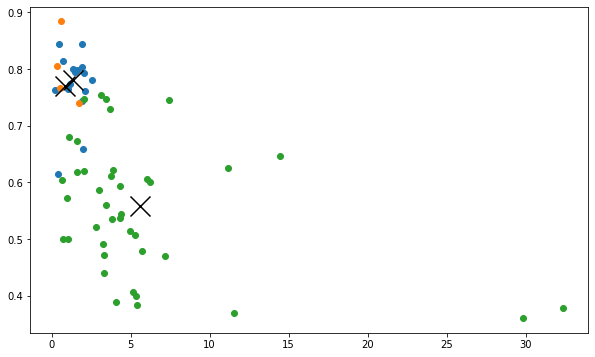

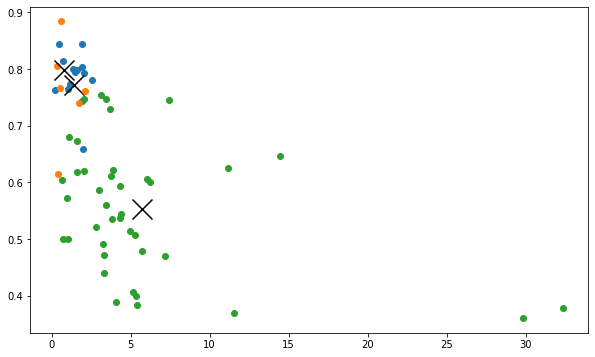

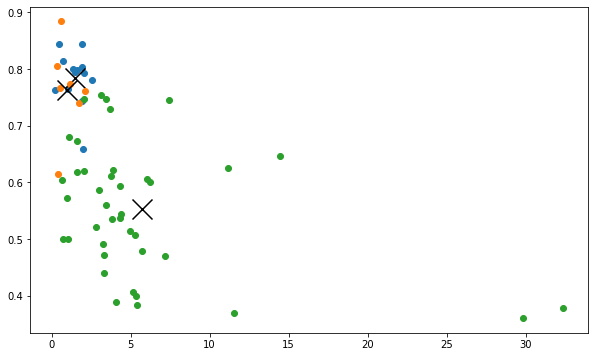

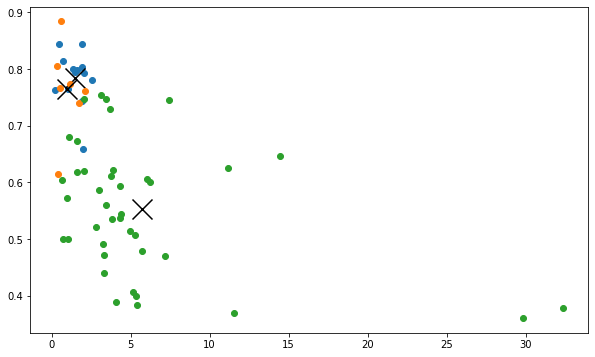

In [52]:
k = 3
centroides = {}
iteraciones = 6
contador = 12
for i in range(k):
  centroides[i] = X[np.random.choice(len(X))]

for itera in range(iteraciones):
  #distancias
  distancias = {}

  for pos, datos in enumerate(X):
    distancias[pos] = []
    for pos_, centroide in centroides.items():
      distancias[pos].append(dista_euclidiana(datos, centroide))

  #asignar cada punto a un centroide por la mínima distancia

  puntos_centroides = {}

  for i in range(k):
    puntos_centroides[i] = []

  for pos_dato, distancias in distancias.items():
    puntos_centroides[distancias.index(min(distancias))].append(X[pos_dato])

  #nuevo centroide
  fig, ax = plt.subplots(1, 1, figsize=(10,6))
  for centroide, datos in centroides.items():
    ax.scatter(np.vstack(puntos_centroides[centroide])[:,0],np.vstack(puntos_centroides[centroide])[:,1])
    ax.scatter(datos[0],datos[1], marker='x', s=400, color='k')
  
  fig.savefig(f'imagen{contador}.png')
  plt.show()


  for centroide, datos in puntos_centroides.items():
    centroides[centroide] = np.average(np.vstack(datos), axis=0)

  contador += 1

#FIN CLUSTERS Y K MEANS 

In [53]:
import os
import re
os.listdir()

['.config',
 'davies.png',
 'davies.jpg',
 'kmea.csv',
 'imagen13.png',
 'imagen14.png',
 'prueba.png',
 'CODO.png',
 'imagen12.png',
 'imagen17.png',
 'imagen15.png',
 'mygif.gif',
 'imagen16.png',
 'sample_data']

In [54]:
reg = [re.findall('\w*\.png', i)[0] for i in os.listdir() if len(re.findall('\w*\.png', i))>0]

In [55]:
reg.sort()

In [63]:
import imageio as io
with io.get_writer('Visualización CC.gif', mode='I', fps=2.5) as writer:
    for filename in reg:
        image = io.imread(filename)
        writer.append_data(image)
writer.close()

In [59]:
#grafico de los PCA con los kmeans de forma distintiva.
Scene = dict(xaxis = dict(title  = 'PCA1'),yaxis = dict(title  = 'PCA2'),zaxis = dict(title  = 'PCA3'))
labels = kmeans.labels_
trace = go.Scatter3d(x=pca_3['PCA1'], y=pca_3['PCA2'], z=pca_3['PCA3'], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()